<a href="https://colab.research.google.com/github/GeorgeKMaina/hypothyroidism/blob/main/hypothyroidism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Understanding

a) Defining the question

Nairobi Hospital conducted a clinical camp to test for hypothyroidism. The data collected focused on Thyroid patients. We are required to use the datasets provided to build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.

b)Metrics for success

The project will be considered successful if we are able to use decision trees and SVM to build several models that predict whether or not the patient's symptoms indicate that they have hypothyroid, then using their accuracy levels and RMSE values, pick the model that would be more accurate at the predictions..

c) Understanding the context

Hypothyroidism (underactive thyroid) is a condition in which your thyroid gland doesn't produce enough of certain crucial hormones.

Hypothyroidism may not cause noticeable symptoms in the early stages. However, over time, untreated hypothyroidism can cause a number of health problems, such as obesity, joint pain, infertility and heart disease.

The different thyroid function tests such as TSH, T3, T4U, Total T4 (TT4), and Free T4 Index (FTI) are done to assess the various functions related to the thyroid gland. A normal TSH and normal T4 is indicative of normal functioning of the thyroid gland, a low TSH and elevated T4 indicates hyperthyroidism, a low TSH and low T4 indicates secondary hypothyroidism, and a high TSH and low T4 indicates primary hypothyroidism. T3 tests are used for determining the severity of the hyperthyroidism or to diagnose the hyperthyroidism.

The normal values for these tests are:

- TSH that ranges between 0.4 to 5.0 milli-International Unit per liter.

- Total T4 (TT4) ranges from 4.6 to 12 micrograms per deciliter of blood.

- T3 that ranges between 100 to 200 nanogram per deciliter of blood.
Free T4 Index (FTI) or FT4 that ranges between 0.7-1.9 nanogram per decilitre of blood.
Nairobi Hospital conducted a clinical camp carrying out the above tests to test for hypothyroidism. The data collected focused on Thyroid patients. We are required to use the datasets provided to build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.

d)Recording the experimental design

The following steps will be followed during this exercise:

1. Data Understanding
2. Data Preparation
3. Data Cleaning
4. Perform EDA
5. Modelling
6. Evaluation

e) Data relevance

The data used contains the following columns:

Status: Indicates whether a patient has hypothyroidism or not

Age: Indicates patient's age

Sex: Indicates patient's gender

on_thyroxine: Indicates whether patient is on Thyroxine

query_on_thyroxine: Indicates whether there are further wqueries on the 
patient's thyroxine levels.

on_antithyroid_medication: Indicates whether a patient is on antithyroid medication
thyroid_surgery: Indicates whether a patient has undergone thyroid surgery.

query_hypothyroid: Indicates whether there are further queries on the patient's hypothyroid status.

query_hyperthyroid: Indicates whether there are further queries on the patient's hyperthyroid status.

pregnant: Indicates whether a patient is pregnant

sick: Indicates whether a patient is sick

tumor: Indicates whether a patient has a tumor

lithium: Indicates whether a patient has lithium

goitre: Indicates whether a patient has lithium

TSH_measured: Indicates whether a patient's Thyroid Stimulating Hormone was measured

TSH: Indicates the patient's Thyroid Stimulating Hormone levels, if it was measured

T3_measured: Indicates a whether a patient's Triiodothyronine was measured

T3: Indicates the patient's Triiodothyronine levels, if it was measured

TT4_measured: Indicates a whether a patient's Total Thyroxine was measured

TT4: Indicates the patient's Total Thyroxine levels, if it was measured.

T4U_measured: Indicates whether the patient had the T4 uptake test done on them.

T4U: Indicates the patient's levels of thyroxine uptake in the blood, if it was measured.

FTI_measured: Indicates whether the patient's Free Thyroxine Index was calculated.

FTI: Indicates the patient's Free Thyroxine Index.

TBG_measured: Indicates whether the patient's Thyroid-binding Globulin was measured.

 TBG: Indicates the patient's Thyroid-binding Globulin levels, if it was measured.


# Data Preparation

Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pydotplus
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC,LinearSVC

In [3]:
# Loading our datset
df = pd.read_csv('http://bit.ly/hypothyroid_data')
df

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.80,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.20,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.10,y,65,y,0.48,y,137,n,?


In [4]:
# Previewing the first 10 records
#
df.head(10)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?
5,hypothyroid,85,F,f,f,f,f,t,f,f,f,f,f,f,y,138,y,1.10,y,27,y,1.19,y,23,n,?
6,hypothyroid,64,F,f,f,f,t,f,f,f,f,f,f,f,y,7.70,y,1.30,y,54,y,0.86,y,63,n,?
7,hypothyroid,72,F,f,f,f,f,f,f,f,f,f,f,f,y,21,y,1.90,y,34,y,1.05,y,32,n,?
8,hypothyroid,20,F,f,f,f,f,t,f,f,f,f,f,f,y,92,n,?,y,39,y,1.21,y,32,n,?
9,hypothyroid,42,F,f,f,f,f,f,f,f,f,f,f,f,y,48,n,?,y,7.60,y,1.02,y,7.50,n,?


In [5]:
# Previewing the last 10 records
#
df.tail(10)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3153,negative,78,F,f,f,f,f,f,t,f,f,f,f,f,y,0,y,1.70,y,106,y,1.03,y,99,n,?
3154,negative,72,F,t,f,f,f,f,f,f,f,f,f,f,y,0.01,y,1.10,y,240,y,1.07,y,223,n,?
3155,negative,?,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,2.40,y,123,y,0.99,y,124,n,?
3156,negative,40,F,f,f,f,f,f,f,f,t,f,f,f,y,2.10,y,1.20,y,76,y,0.90,y,84,n,?
3157,negative,69,F,f,f,f,f,f,f,f,f,f,f,f,y,2.60,y,1.80,y,126,y,1.02,y,124,n,?
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.80,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.20,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.10,y,65,y,0.48,y,137,n,?
3162,negative,56,F,t,f,f,f,f,f,f,f,f,f,f,y,0,y,1.80,y,139,y,0.97,y,143,n,?


In [6]:
# Checking the number of rows and columns
#
df.shape

(3163, 26)

In [7]:
# Checking the column datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   status                     3163 non-null   object
 1   age                        3163 non-null   object
 2   sex                        3163 non-null   object
 3   on_thyroxine               3163 non-null   object
 4   query_on_thyroxine         3163 non-null   object
 5   on_antithyroid_medication  3163 non-null   object
 6   thyroid_surgery            3163 non-null   object
 7   query_hypothyroid          3163 non-null   object
 8   query_hyperthyroid         3163 non-null   object
 9   pregnant                   3163 non-null   object
 10  sick                       3163 non-null   object
 11  tumor                      3163 non-null   object
 12  lithium                    3163 non-null   object
 13  goitre                     3163 non-null   object
 14  TSH_meas

In [8]:
# Checking for the missing values
df.isna().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

In [9]:
# Checking for duplicates
#
df.duplicated().sum()

77

In [10]:
# Filtering out duplicates
#
df[df.duplicated()]

#Most of our 'duplicated' rows have different data on most of the columns, thus we will not be deleting them.

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
53,hypothyroid,69,F,f,f,f,f,f,f,f,f,f,f,f,y,21,y,0.80,y,53,y,0.86,y,61,n,?
66,hypothyroid,62,M,f,f,f,f,f,f,f,f,f,f,f,y,100,y,0.40,y,10,y,1,y,10,n,?
124,hypothyroid,77,F,f,f,f,f,f,f,f,f,f,f,f,y,23,y,0.50,y,33,y,0.67,y,49,n,?
128,hypothyroid,79,F,f,f,f,f,f,f,f,f,f,f,f,y,29,y,1.60,y,47,y,0.97,y,48,n,?
131,hypothyroid,50,F,t,f,f,f,f,f,f,f,f,f,f,y,34,n,?,y,55,y,0.93,y,60,n,?
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3048,negative,28,M,f,f,f,f,f,f,f,f,f,f,f,y,1,y,3.10,y,107,y,1.05,y,103,n,?
3055,negative,33,F,f,f,f,f,f,f,f,f,f,f,f,n,?,y,0.80,y,88,y,1.02,y,86,n,?
3066,negative,74,F,t,f,f,f,f,f,f,f,f,f,f,y,21,y,1.80,y,126,y,1.18,y,107,n,?
3111,negative,89,M,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.90,y,82,y,0.80,y,103,n,?


In [11]:
# Changing column titles to lower case
#
df.columns = df.columns.str.lower()
# Previewing the columns to confirm whether the changes have taken effect
#
df.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'tsh_measured', 'tsh', 't3_measured', 't3', 'tt4_measured', 'tt4',
       't4u_measured', 't4u', 'fti_measured', 'fti', 'tbg_measured', 'tbg'],
      dtype='object')

In [12]:
# Some of our colums have "?" as a value, for entries that contain no values. For example, those who's TSH was not measured, you will find that on column "tsh_measured" their values will be "n" and on column "tsh", the entry will have "?"
# Thus we  shall replace them so they look like missing values

df.replace('?', np.nan, inplace=True)
df

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,tsh_measured,tsh,t3_measured,t3,tt4_measured,tt4,t4u_measured,t4u,fti_measured,fti,tbg_measured,tbg
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,NaN
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,NaN
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,NaN
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,NaN
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.80,y,1.70,y,86,y,0.91,y,95,n,NaN
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,1.80,y,99,y,1.01,y,98,n,NaN
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.20,y,0.60,y,71,y,0.68,y,104,n,NaN
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.10,y,65,y,0.48,y,137,n,NaN


In [13]:
# We will group our numerical and categorical data
#
num_cols = ['age', 'tsh', 't3', 'tt4', 't4u', 'tbg','fti']

cat_cols = ['status', 'sex','tsh_measured', 't3_measured', 'tt4_measured','t4u_measured', 'fti_measured', 'tbg_measured']

In [14]:
# Change numerical columns to float dtype, categories to category dtype and boolean to integer with 0 or 1
#
bool_cols = ['on_thyroxine', 'query_on_thyroxine','on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid','query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre']

for column in bool_cols:
  df[column] = df[column].replace('f', 0)
  df[column] = df[column].replace('t', 1)

for column in df.columns:
  if column in num_cols:
    df[column] = df[column].astype('float')
  elif column in cat_cols:
    df[column] = df[column].astype('category')
  elif column in bool_cols:
    df[column] = df[column].astype('int')

In [15]:
# Check data types to confirm conversion
#
df.dtypes

status                       category
age                           float64
sex                          category
on_thyroxine                    int64
query_on_thyroxine              int64
on_antithyroid_medication       int64
thyroid_surgery                 int64
query_hypothyroid               int64
query_hyperthyroid              int64
pregnant                        int64
sick                            int64
tumor                           int64
lithium                         int64
goitre                          int64
tsh_measured                 category
tsh                           float64
t3_measured                  category
t3                            float64
tt4_measured                 category
tt4                           float64
t4u_measured                 category
t4u                           float64
fti_measured                 category
fti                           float64
tbg_measured                 category
tbg                           float64
dtype: objec

In [16]:
# Checking for missing values again
#
df.isnull().sum()

#Our dataset now has quite alot of missing values. We shalll drop the tbg column as it has close to 50% of it's values as missing.

#Since the "tsh", "t3", "tt4", "t4u" & "fti" columns are important tests for our predictions on hypothyroidism, we do not want to skew the data.

#Thus we will fill the missing values as 0 since essentially since those tests were not performed, the levels are assumed to be 0

status                          0
age                           446
sex                            73
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
tsh_measured                    0
tsh                           468
t3_measured                     0
t3                            695
tt4_measured                    0
tt4                           249
t4u_measured                    0
t4u                           248
fti_measured                    0
fti                           247
tbg_measured                    0
tbg                          2903
dtype: int64

In [17]:
# Dropping "tbg" column
#
df.drop(["tbg"], axis = 1, inplace = True)

# Filling the missing values as 0
#
df[["tsh", "t3", "tt4", "t4u", "fti"]] = df[["tsh", "t3", "tt4", "t4u", "fti"]].fillna(0)

# We shall check for nulls just to make sure our changes were done
#
df.isnull().sum()


#We now only have missing values in age & sex.

#We shall create a box plot for age column to check for outliers so as to know the appropriate measure of central tendency to impute.

#For the sex column, we shall impute the mode since it is the only measure of central tendency that works for categorical data.

status                         0
age                          446
sex                           73
on_thyroxine                   0
query_on_thyroxine             0
on_antithyroid_medication      0
thyroid_surgery                0
query_hypothyroid              0
query_hyperthyroid             0
pregnant                       0
sick                           0
tumor                          0
lithium                        0
goitre                         0
tsh_measured                   0
tsh                            0
t3_measured                    0
t3                             0
tt4_measured                   0
tt4                            0
t4u_measured                   0
t4u                            0
fti_measured                   0
fti                            0
tbg_measured                   0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


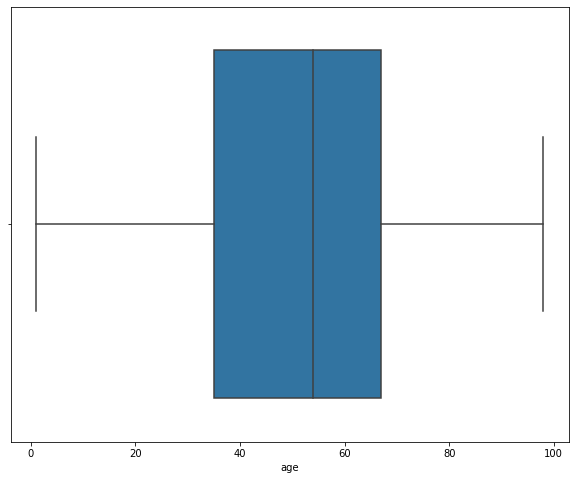

In [18]:
# Box plot for age
#
fig, ax = plt.subplots(figsize = (10,8))
sns.boxplot(df.age)


In [19]:
# Imputing the mean for the age column & the mode for the sex column
df['age'].fillna(df["age"].mean(), inplace=True)

# Getting mode for sex column
#
s_mode = df['sex'].mode()

# Impution our mode, 'F
df['sex'].fillna('F', inplace = True)

#decoding sex values

# Checking for null values again
df.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
tsh_measured                 0
tsh                          0
t3_measured                  0
t3                           0
tt4_measured                 0
tt4                          0
t4u_measured                 0
t4u                          0
fti_measured                 0
fti                          0
tbg_measured                 0
dtype: int64

In [20]:
# Checking the final shape of our dataset
#
df.shape

(3163, 25)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

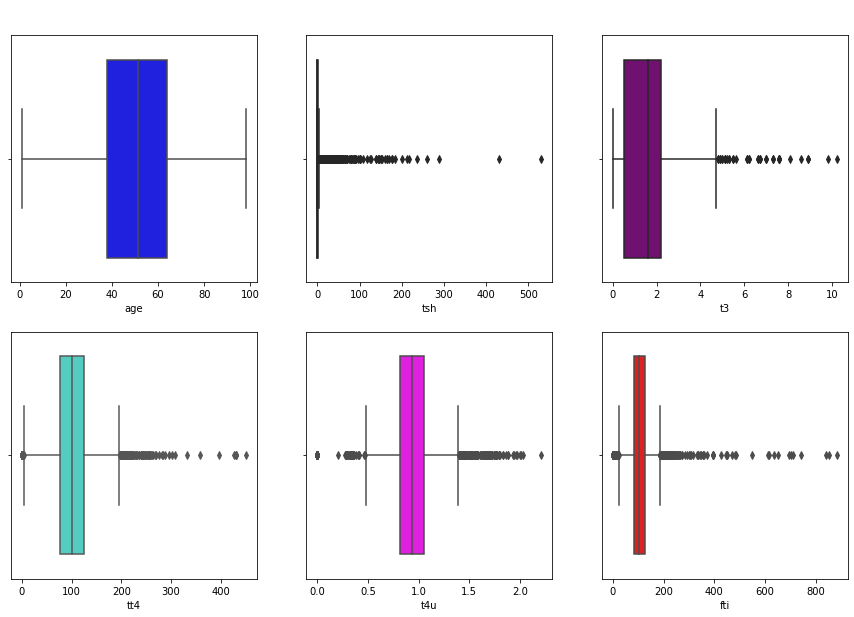

In [21]:
# Checking for outliers
#
# Defining the columns to check for outliers.
num_cols = ['age', 'tsh', 't3', 'tt4', 't4u', 'fti']

df_num = df[num_cols]
# Defining the colors to be used in the boxplots
#
colors = ['blue','green','purple','turquoise','magenta','red','fuchsia','black']
# Used a for loop to plot boxplots for each of the selected columns.
#
fig, axes = plt.subplots(nrows=2,ncols=3,figsize=(15,10))
plt.suptitle('Checking for outliers',fontsize=15,y=0.92,color='white')
for ax,data,column,color in zip(axes.flatten(),df,num_cols,colors):
  sns.boxplot(df[column], ax=ax, color=color)
  ax.set_facecolor('white')

There are no outliers on the age column

Most of the data on the TSH & TBG column appear as outliers. The rest of the test columns also have alot of outliers.

We will not be removing our outliers as these are the determining factors of whether one has hypothyroidism

#EDA

###Univariate Analysis

#####Measures of Central Tendency & Dispersion

In [22]:
# Plotting the univariate summaries and recording our observations
#

def uni_stats(df):
  out_df = pd.DataFrame(columns=['Count', 'Unique', 'Mode', 'Mean', 'Min','25%', 'Median', '75%', 'Max', 'Std_dev', 'Skew', 'Kurt' ])


  for col in df:
    out_df.loc[col] = [df_num[col].count(), df_num[col].nunique(), df_num[col].mode().values[0], df_num[col].mean(), df_num[col].min(), 
                         df_num[col].quantile(0.25), df_num[col].median(), df_num[col].quantile(0.75), df_num[col].max(), df_num[col].std(), df_num[col].skew(), df_num[col].kurt()]
  return out_df

uni_stats(df_num)

,Count,Unique,Mode,Mean,Min,25%,Median,75%,Max,Std_dev,Skew,Kurt
age,3163.0,93.0,51.154214,51.154214,1.0,38.00,51.154214,64.00,98.00,17.881969,-0.175276,-0.625620
tsh,3163.0,239.0,0.000000,5.046782,0.0,0.00,0.400000,1.80,530.00,22.160083,11.041893,178.553139
t3,3163.0,69.0,0.000000,1.513531,0.0,0.50,1.600000,2.20,10.20,1.191836,1.139446,4.457922
tt4,3163.0,269.0,0.000000,100.281031,0.0,76.00,100.000000,124.00,450.00,52.588757,0.693852,3.873765
t4u,3163.0,158.0,0.000000,0.901502,0.0,0.82,0.940000,1.05,2.21,0.341286,-0.914779,2.320298
fti,3163.0,280.0,0.000000,106.386310,0.0,85.00,105.000000,126.00,881.00,65.607474,3.633281,32.531517


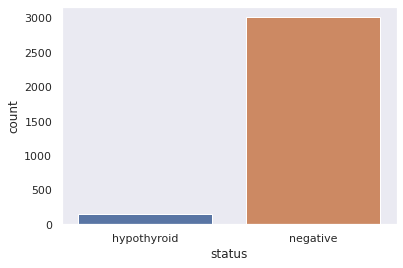

In [23]:
# Plotting the number of patients with hypothyroidism vis-a-vis those without
sns.set(style= "dark")
ax = sns.countplot(x="status", data=df)

###### From our plot, we see that most of the patients tested negative for hypothyroidism

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_

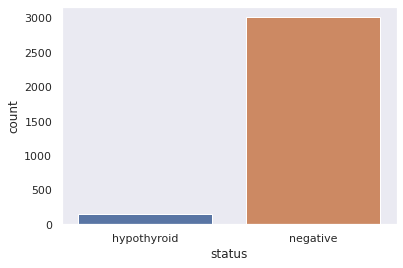

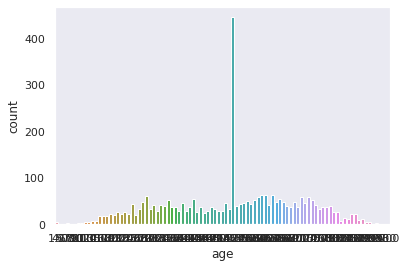

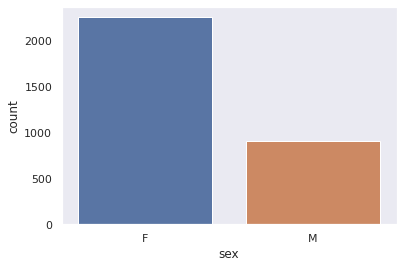

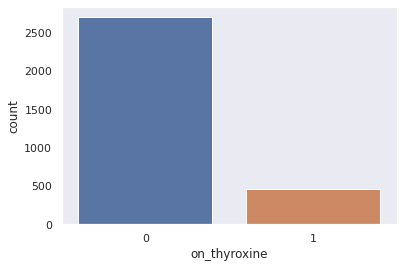

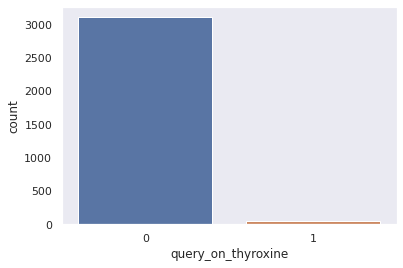

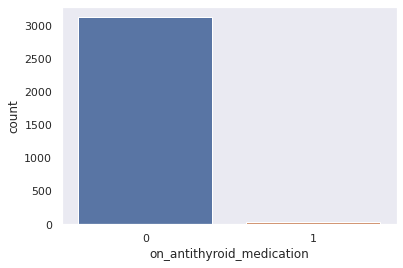

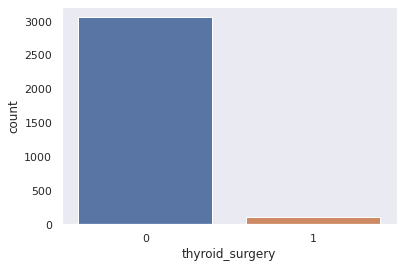

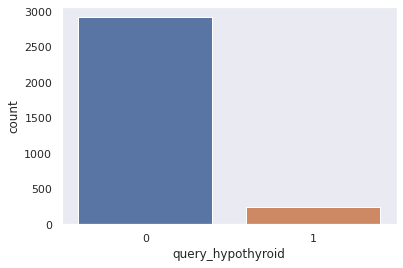

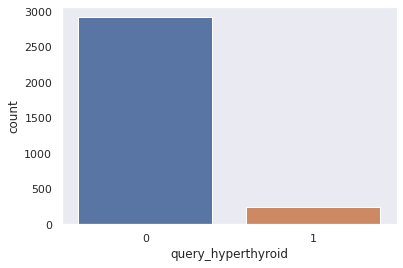

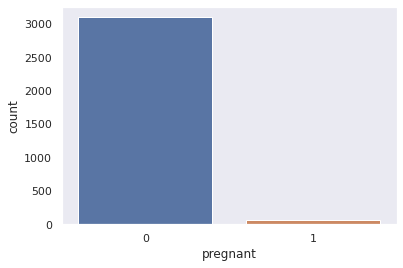

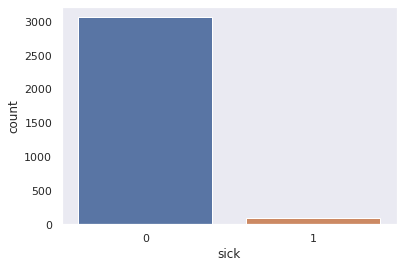

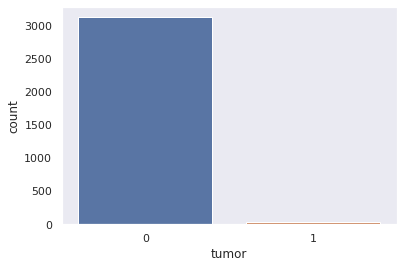

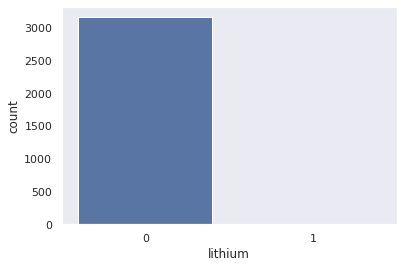

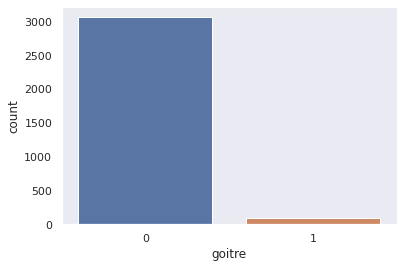

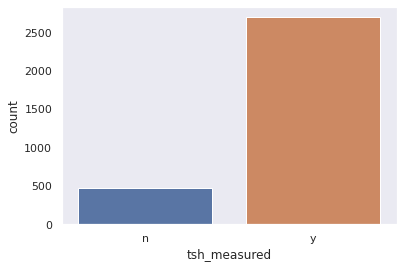

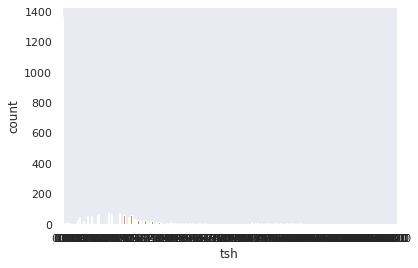

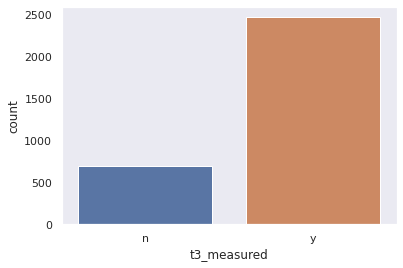

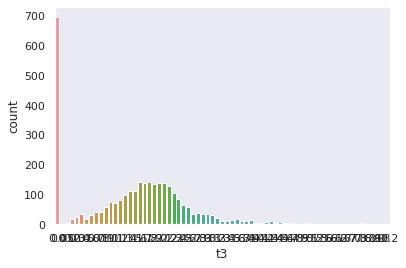

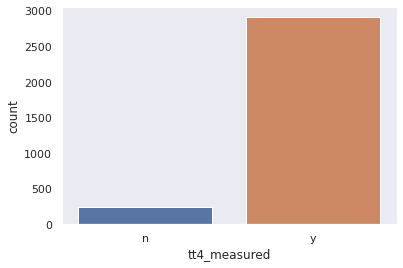

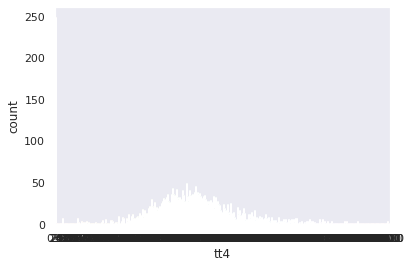

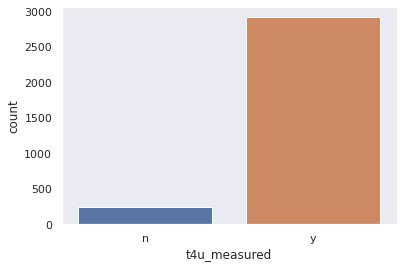

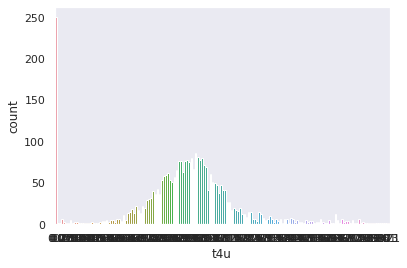

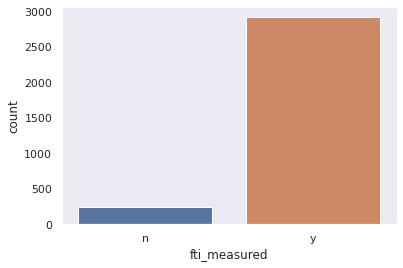

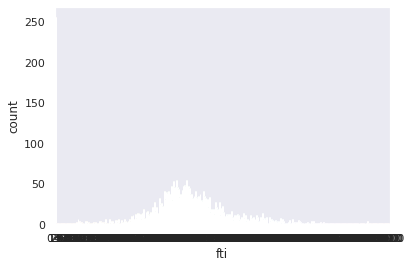

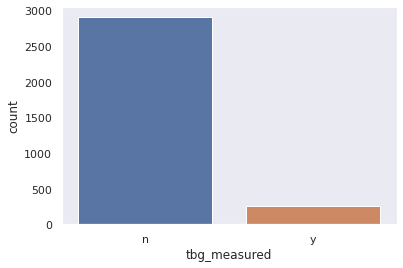

In [24]:
# Plotting distribution of patients across the different variables
#

for i, col in enumerate(df.columns):
    plt.figure(i)
    sns.countplot(x=col, data=df)

##### From our plots above, we can see that most of our patients are negative. A very low portion of our patients suffer from hypothyroidism

##### From our summary statistics earlier, we had seen that our modal age was 51. From our plot, we can see that that age has more than 5 times as many patients as compared to the other ages.

###### We can also see that most of our patients were female. Actually, the male patients correspond to less than half of the total female patients.

###### Patients who are currently on thyroxine correspond to less than a quarter of those who aren't.

###### The values for patients with quesries on thyroxine, hypothyroidism & hyperthyroidoism are significantly low as compared to those without.

###### Patients who are on anti-thyroid medication, have had thyroid surgery,are pregnant, sick, have a tumor or goitre, are extremely low as compared to those who have none of those conditions.

###### We shall check on the relationships between our tests and other variables to comment appropriately on them, although we do have plots on their distributions as shown. Most patients were tested f

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warnin

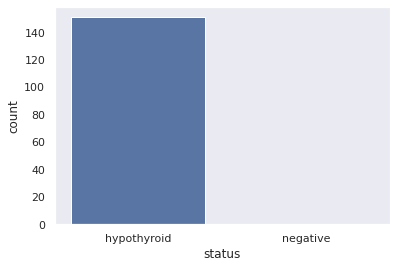

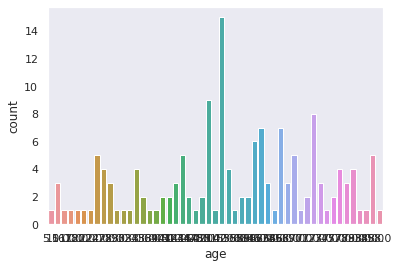

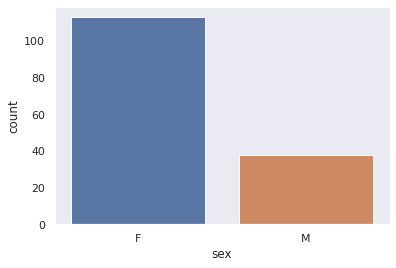

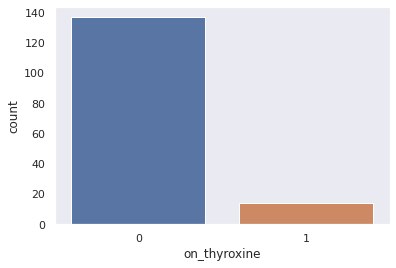

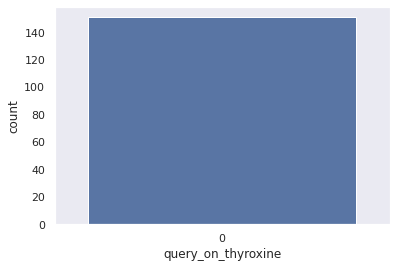

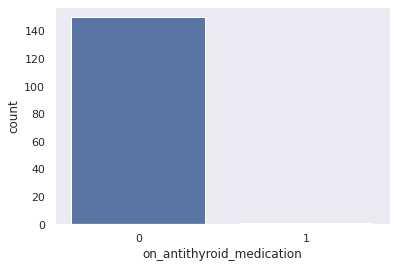

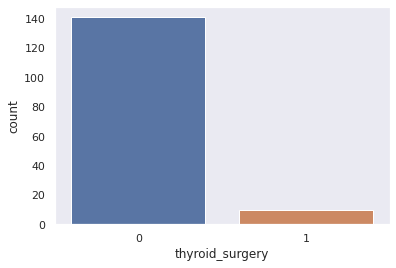

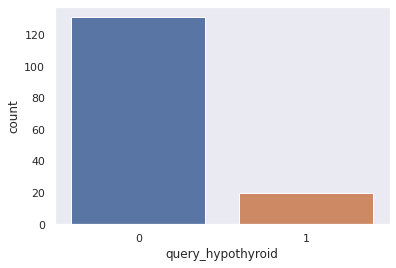

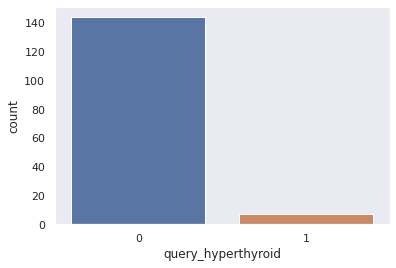

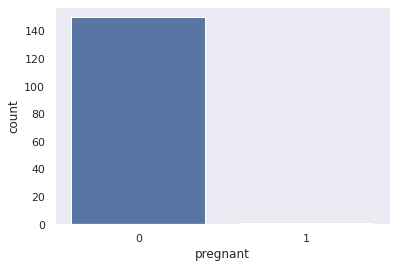

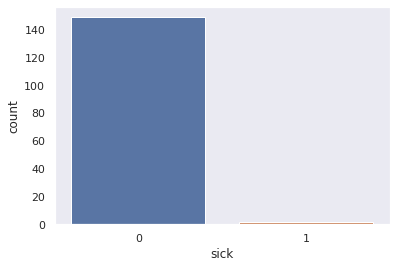

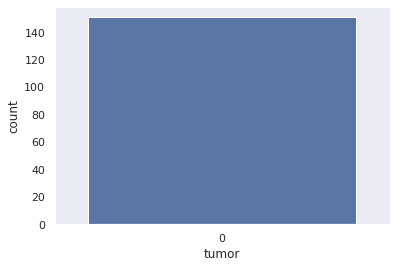

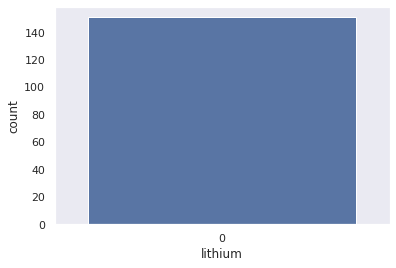

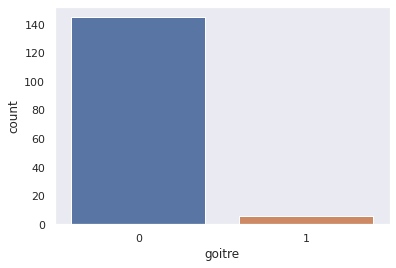

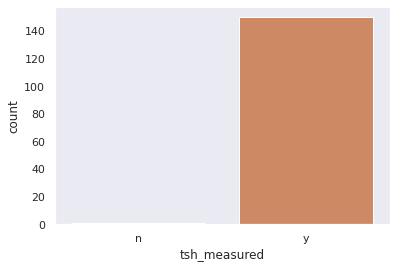

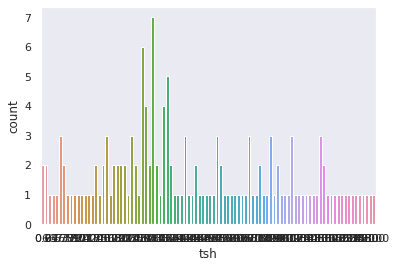

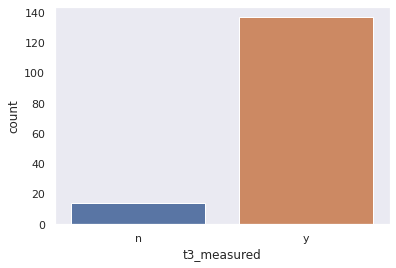

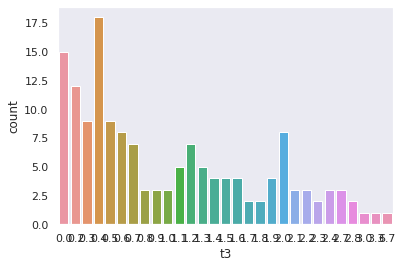

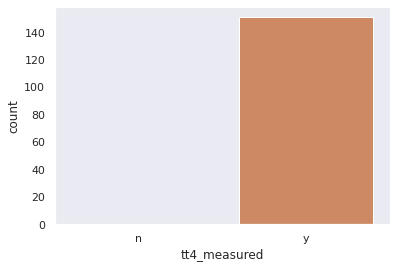

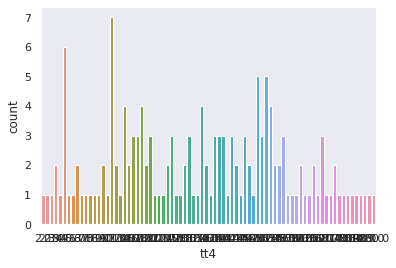

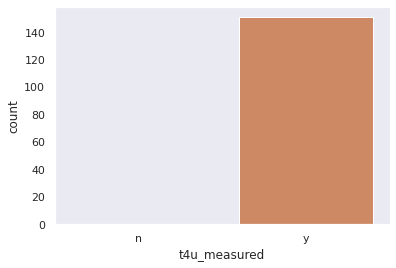

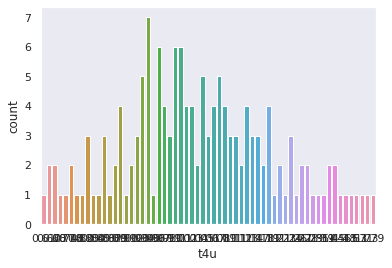

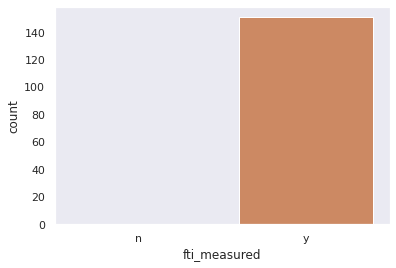

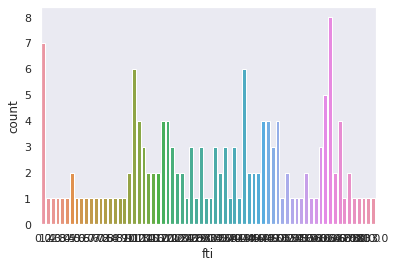

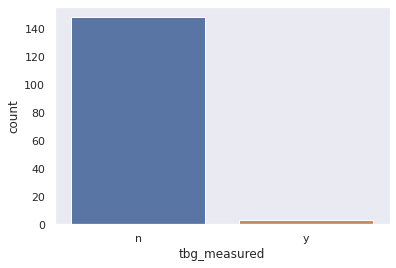

In [25]:
# Plotting distribution of patients suffering from hypothyroidism across the different variables
#
df1 = df[df['status'] == "hypothyroid"]
# df_1 = df_1.reset_index(inplace=True)

#df1 = df.select_dtypes([np.int, np.float])
for i, col in enumerate(df1.columns):
    plt.figure(i)
    sns.countplot(x=col, data=df1)

###### Since we have filtered the dataset to contain patients suffering from hypothyroidism, all of our patients suffer from hypothyroidism

###### We can still see that our modal age was 51, however the difference isn't as stark when we filter patients with hypothyroidism, as compared to the other ages.

###### Most of our patients are still female & still correspond to more than twice the male.

###### Patients who are currently on thyroxine are extremely few as compared to those who arent.

###### The values for patients with quesries on thyroxine, hypothyroidism & hyperthyroidoism are significantly low as compared to those without.

###### Patients who are on anti-thyroid medication, have had thyroid surgery,are pregnant, sick, have a tumor or goitre, are extremely low as compared to those who have none of those conditions.

###### Most of the distributions for patients ith hypothyroidism are consistent with the general distributions above.

## Bivariate Analysis

<Figure size 480x320 with 0 Axes>

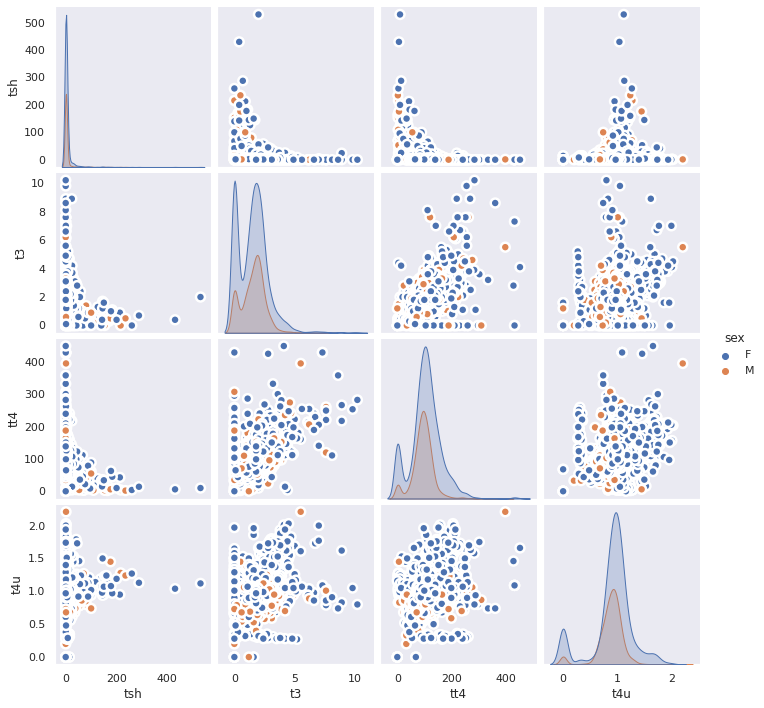

In [26]:
# Ploting our bivariate summaries and recording our observations
#
plt.figure(dpi= 80)
sns.pairplot(df[['tsh', 't3', 'tt4', 't4u', 'sex']], kind="scatter", hue="sex", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()

We can see that t3 & tt4 and tt4 & t4u pairs have a relationship. Let's check this further with our correlation.

In [27]:
# Check for correlation
#
correlation = df_num.corr()
correlation

,age,tsh,t3,tt4,t4u,fti
age,1.000000,0.011725,-0.079260,-0.005226,-0.028418,0.072473
tsh,0.011725,1.000000,-0.085072,-0.220293,0.095537,-0.186038
t3,-0.079260,-0.085072,1.000000,0.502813,0.457418,0.336268
tt4,-0.005226,-0.220293,0.502813,1.000000,0.599128,0.763978
t4u,-0.028418,0.095537,0.457418,0.599128,1.000000,0.204452
fti,0.072473,-0.186038,0.336268,0.763978,0.204452,1.000000


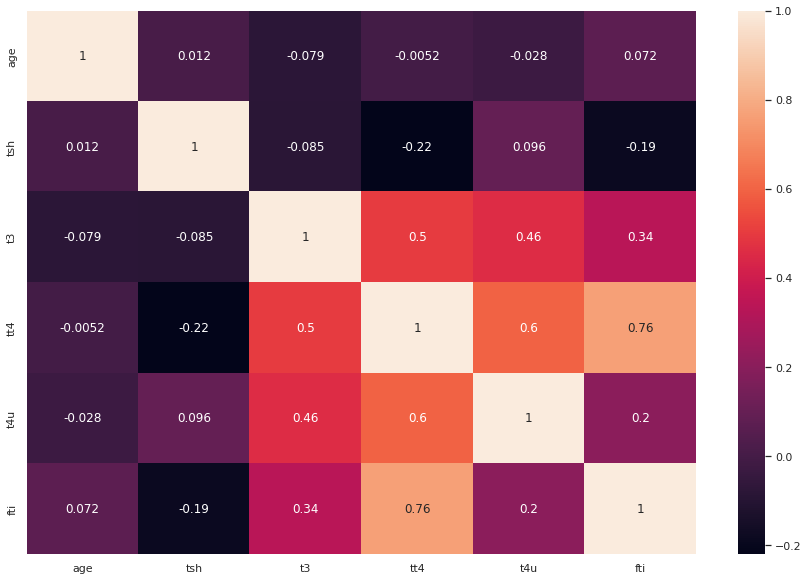

In [28]:
# Plotting a correlation heatmap
#
plt.figure(figsize = (15,10))
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True)

We can see a high positive correlation between the fti & tt4 tests at 0.76 and tt4 & tu tests at 0.6. There is a low positive correlation between t3 & tt4, fti & t3, fti & t4u, t4u & t3 and tt4 & t3.
T3 & age and t3 & tsh have low negative correlation.

In [29]:
df.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,tsh_measured,tsh,t3_measured,t3,tt4_measured,tt4,t4u_measured,t4u,fti_measured,fti,tbg_measured
0,hypothyroid,72.0,M,0,0,0,0,0,0,0,0,0,0,0,y,30.0,y,0.6,y,15.0,y,1.48,y,10.0,n
1,hypothyroid,15.0,F,1,0,0,0,0,0,0,0,0,0,0,y,145.0,y,1.7,y,19.0,y,1.13,y,17.0,n
2,hypothyroid,24.0,M,0,0,0,0,0,0,0,0,0,0,0,y,0.0,y,0.2,y,4.0,y,1.00,y,0.0,n
3,hypothyroid,24.0,F,0,0,0,0,0,0,0,0,0,0,0,y,430.0,y,0.4,y,6.0,y,1.04,y,6.0,n
4,hypothyroid,77.0,M,0,0,0,0,0,0,0,0,0,0,0,y,7.3,y,1.2,y,57.0,y,1.28,y,44.0,n


# Modelling

In [30]:
# Dropping the columns indicating whether one had a particular test done or not since this data will be available on the columns with the levels.
#
df = df.drop(['tsh_measured', 't3_measured', 'tt4_measured', 't4u_measured','fti_measured', 'tbg_measured'],axis=1)


###### Baseline Model

In [31]:
# Getting the dummy variables for the boolean columns in our dataset
df = pd.get_dummies(df, drop_first=True)


In [32]:
# Since our question is a classification problem, we will use Logistic Regression for the baseline model.
from sklearn.linear_model import LogisticRegression

regression = LogisticRegression()
X = df.drop(['status_negative'],axis=1)
y = df['status_negative']
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

#Fitting my Logistic Regression on the train data
#
regression.fit(X_train,y_train)

# Predicting the values based on the Logistic Regression
#
y_predict = regression.predict(X_test)

# Metrics
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predict))

Root Mean Squared Error: 0.14517167628488534
Mean Squared Error: 0.02107481559536354


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


The model has an RMSE of 0.14
The RMSE is small which is a good thing

In [33]:
# We will use the VIF core to check our multicollinearity
#
pd.DataFrame(np.linalg.inv(correlation.values), index = correlation.index, columns=correlation.columns)

,age,tsh,t3,tt4,t4u,fti
age,1.023120,-0.001172,0.105905,0.162424,-0.071710,-0.219406
tsh,-0.001172,1.172702,0.054313,0.758185,-0.536032,-0.269655
t3,0.105905,0.054313,1.424864,-0.389882,-0.400525,-0.096958
tt4,0.162424,0.758185,-0.389882,5.380662,-2.427449,-3.354024
t4u,-0.071710,-0.536032,-0.400525,-2.427449,2.399671,1.404058
fti,-0.219406,-0.269655,-0.096958,-3.354024,1.404058,3.273676


All of our columns have no multicollinearity, except for the tt4 test which has 5.38. Since it is close to 5, we shall leave it and do feature importance in our random forest models.

## Decision Trees

In [34]:
# Defining the predictor and target variables.
#
X = df.drop(['status_negative'],axis=1)
y = df['status_negative']
# Building my model
#
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)
tree = DecisionTreeClassifier()
tree = tree.fit(X_train,y_train)
y_pred = tree.predict(X_test)

# Assessing the perfromance of the model.

print('Accuracy:', metrics.accuracy_score(y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Accuracy: 0.9852476290832455
Root Mean Squared Error: 0.1214593385325084


Our model has an accuracy of 98.31%, thus it did a good job predicting, however that means it is overfitting. We shall hyperparameter tuning on our random forest models and check if anything will change.

Our model has an RMSE of 0.1298, which is fairly low and thus our modelis a good fit.

## Random Forest Clasifier

In [35]:
# Fitting our data in a Random Forest model.
#
forest = RandomForestClassifier(n_estimators=100,random_state=42,min_samples_split=20,max_depth=5)
forest.fit(X_train,y_train)

# Predicting using our test values.
#
y_predict = forest.predict(X_test)

#Printing out the mtrics which is the RMSE and the accuracy
print('Accuracy is:', metrics.accuracy_score(y_test,y_predict))
print('Root Mean Square Error: ', np.sqrt(metrics.mean_squared_error(y_test,y_predict)))

Accuracy is: 0.9799789251844047
Root Mean Square Error:  0.14149584734399578


Our model has an accuracy of 98% which means still has overfitted. We will do a random search to reduce overfiting of our model.

Our RMSE is 14% which is fairly small, meaning the test was a good fit.

In [36]:
#Predicting using our test values.
y_predict = forest.predict(X_test)

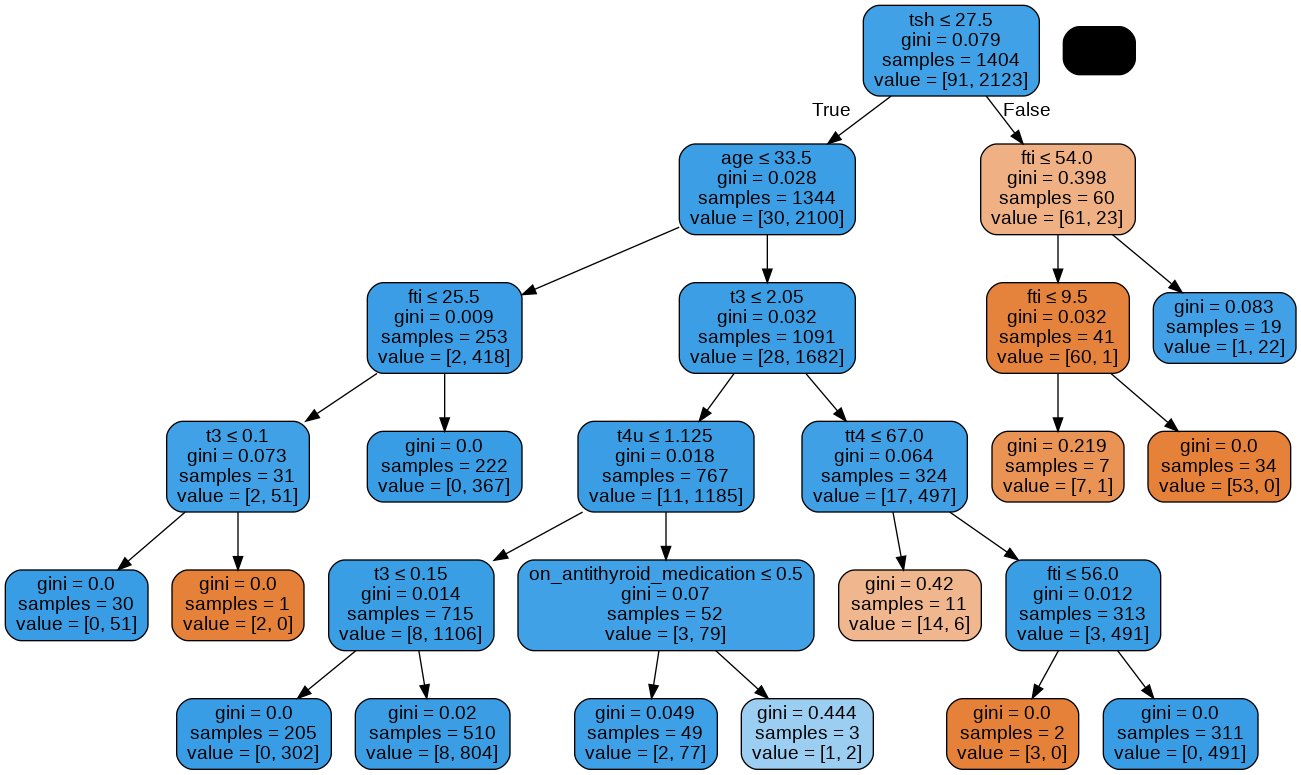

In [37]:
# Visualizing the decision tree of our 50th tree in our forest.
#
StringIO().write(str((1,2)))
tree = forest.estimators_[3]

dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
graph.write_png('Hypothroidism') 
Image(graph.create_png())

In [38]:
# Hyperparamter Tuning
# Creating an array for the no of trees between 200 and 2000
#
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000,num=10)]
# Defining the number of features to consider at every split
#
max_features = ['auto','sqrt']
#Estimating the number of levels in every tree
#
max_depth = [int(x) for x in np.linspace(10,110,num=11)]
max_depth.append(None)
# Estimating the number of samples required to split at every node
#
min_samples_split = [2,5,10]
# Estimating the number of samples at each leaf node
#
min_samples_leaf = [1,2,4]
# Defining the methods of selecting samples for training at each tree
#
bootstrap = [True,False]

In [39]:
# Creating a dictionary containing our defined hyperparamters
#
random_grid = {'n_estimators' : n_estimators,
               'max_features' : max_features,
               'max_depth' : max_depth,
               'min_samples_split' : min_samples_split,
               'min_samples_leaf' : min_samples_leaf,
               'bootstrap' : bootstrap}

# Random Searching for hyperparameters using a cross validation of 3 models and ensuring we use the full computational power
#
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,random_state=42,n_jobs=-1)               #
#Fitting our tuned hyperparameters
#
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [40]:
# Searching for the best parameters for our model.
#
rf_random.best_params_

{'bootstrap': False,
 'max_depth': 100,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 800}

I found that the optimal hyperparameters are :

The method of selecting samples for training should be False ie bootstrap
The maxiumum number of levels in a tree should be 90
The number of features to consider at every split should be auto
The minimum number of samples required at each leaf node is 1 sample
The minimum number of samples required to split a node is 2
The optimal number of trees in our forest should be 800 trees.
This will help us know the best optimal way to make our model peform better and reduce overfitting

In [41]:
# Defining our hyperparameters in the random forest classifier model
#
forest = RandomForestClassifier(n_estimators=1000,random_state=42,min_samples_split=2,max_depth=50,bootstrap='False',max_features='auto',min_samples_leaf=1)

# Fitting the train data in our tuned model.
#
forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap='False', max_depth=50, n_estimators=1000,
                       random_state=42)

In [42]:
# Predicting the values in our test set
#
y_predict = forest.predict(X_test)
#Printing out the accuracy of our tuned model which will be used as our metric assessing our model.
print('Accuracy is', metrics.accuracy_score(y_test,y_predict))
print('Root Mean Square Error: ', np.sqrt(metrics.mean_squared_error(y_test,y_predict)))

Accuracy is 0.9841938883034773
Root Mean Square Error:  0.12572235957268166


Our accuracy has increased, while our RMSE has dropped, thus our model has improved

In [43]:
important_feat = pd.DataFrame({'feature': X.columns, 'importance': forest.feature_importances_}).set_index('feature').sort_values(by = 'importance', ascending = False)
important_feat

,importance
feature,
tsh,0.390306
fti,0.215672
tt4,0.181556
t4u,0.075481
t3,0.067186
age,0.035574
on_thyroxine,0.008062
query_hypothyroid,0.007732
sex_M,0.005789


According to the random forest, our most important features are tsh, fti, tt4, t4u, tt3, & age. This is a contrast with our earlier results on LDA since we have used differnt metods in measuring the importance.

AdaBoost Classifier

In [44]:
# Fitting our data in the AdaBoost Classifier
#
ada_boost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=4),n_estimators=300,random_state=40)
ada_boost = ada_boost.fit(X_train,y_train)
#Predicting the values using our test set
#
y_pred_ada = ada_boost.predict(X_test)

#Printing out the accuracy of our model.
print('Accuracy:' ,metrics.accuracy_score(y_test,y_pred_ada))
print('Root Mean Square Error:', np.sqrt(metrics.mean_squared_error(y_test,y_pred_ada)))

Accuracy: 0.9852476290832455
Root Mean Square Error: 0.1214593385325084


Our accuracy is 98.5%, thus our model is overfitting. We will do hyperparameter tuning.

Our RMSE is 0.1215, which still shows that it's a good fit

In [45]:
# Hyperparameter Tuning
# Finding out the hyper parameters that need tuning
#
AdaBoostClassifier()

AdaBoostClassifier()

In [46]:
# Defining the parameters in the AdaBoostClassifier model
#
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num=10)]
learning_rate = [0.01,0.05,0.1,0.3,1]
base_estimator__criterion = ['gini','entropy']
base_estimator__splitter = ['best','random']

# Creating the dictionary that consists of the hyperparameters
#
random_grid = {'n_estimators' : n_estimators,
               'learning_rate' : learning_rate,
               'base_estimator__criterion' : base_estimator__criterion,
               'base_estimator__splitter' : base_estimator__splitter}

# Grid Searching the best parameters of our model
#
ada = AdaBoostClassifier(base_estimator =  DecisionTreeClassifier())
ada_random = RandomizedSearchCV(estimator=ada,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,random_state=50,n_jobs=-1) 

# Fitting the data into our GridSearch
#
ada_random.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3,
                   estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier()),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'base_estimator__criterion': ['gini',
                                                                      'entropy'],
                                        'base_estimator__splitter': ['best',
                                                                     'random'],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.3,
                                                          1],
                                        'n_estimators': [10, 31, 52, 73, 94,
                                                         115, 136, 157, 178,
                                                         200]},
                   random_state=50, verbose=2)

In [47]:
# Finding the best parameters for our model
#
ada_random.best_params_

{'base_estimator__criterion': 'gini',
 'base_estimator__splitter': 'best',
 'learning_rate': 0.1,
 'n_estimators': 31}

In [48]:
# Fitting the best paramters for our model
#
ada_boost = AdaBoostClassifier(algorithm = 'SAMME.R',n_estimators = 73, learning_rate=0.01)
ada_boost.fit(X_train,y_train)

AdaBoostClassifier(learning_rate=0.01, n_estimators=73)

In [49]:
#Using the model to predict values
y_predict = ada_boost.predict(X_test)

# Printing out the accuracy of the model as a metric to assess our model
#
print('Accuracy', metrics.accuracy_score(y_test,y_predict))
print('Root Mean Squared Error:', metrics.mean_squared_error(y_test,y_predict))

Accuracy 0.9831401475237092
Root Mean Squared Error: 0.01685985247629083


Our model's accuracy has reduced by a percentage, and the RMSE has reduced considerably to 0.01686, which is our lowest RMSE so far, thus best performing model so far.

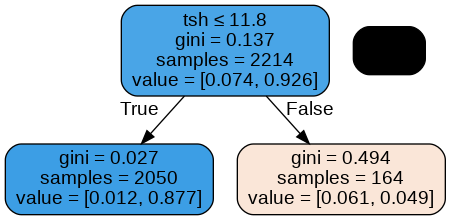

In [50]:
# Printing out the 21st stump
#
dot_data = StringIO()

tree = ada_boost.estimators_[21]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [51]:
#Printing out the most important features in the AdaBoost model.
important_feat = pd.DataFrame({'feature': X.columns, 'importance': ada_boost.feature_importances_}).set_index('feature').sort_values(by = 'importance', ascending = False)
important_feat

,importance
feature,
tsh,0.69863
fti,0.30137
age,0.00000
on_thyroxine,0.00000
t4u,0.00000
tt4,0.00000
t3,0.00000
goitre,0.00000
lithium,0.00000


We can see that tsh & fti are the only important features in AdaBoost Classifier. In Random forest, they were also the most important features. We will use these features in SVM.

Our Decision Tree model performed better than the Logistic model, thus we will use it as our baseline model.

We also prefer the AdaBoost tuned model since it had the lowest RMSE of all our models.

## SVM

Linear Kernel

In [54]:
# For this, we will use our 2 consistently important features as our undependent variables
#
X = df[['tsh', 'fti']]
y = df['status_negative']

# Splitting the data into train and test sets
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

# Normalizing our data
#
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Fitting my data in a linear SVM model
#
model = SVC(kernel='linear')
model.fit(X_train,y_train)

SVC(kernel='linear')

In [55]:
# Predicting the values using the test data
#
y_predict = model.predict(X_test)

In [56]:
# Printing out the accuracy of the model to use it as a metric for perfromance
#
from sklearn import metrics
print('Accuracy', metrics.accuracy_score(y_test,y_predict))
print('Root Mean Squared Error:', metrics.mean_squared_error(y_test,y_predict))

Accuracy 0.9662802950474183
Root Mean Squared Error: 0.03371970495258166


Our model has an accuracy of 96.63% and an RMSE of 0.03, which generally is a good performance.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


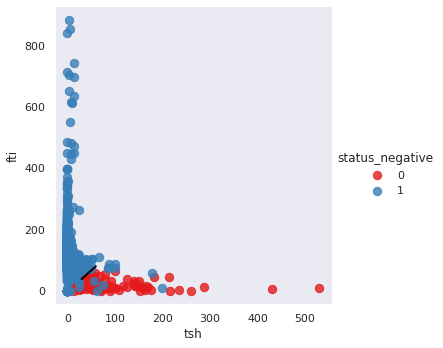

In [58]:
# Get the separating hyperplane
#
w = model.coef_[0] #get the first coefficient of our model
a = -w[0] / w[1]
# Get the x values of our hyperplane. We achieve this by creating a range numbers from the largest number of the butter vlaues and the smallest number of the butter values.  
xx = np.linspace(30, 60)
yy = a * xx - (model.intercept_[0]) / w[1]
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the hyperplane
sns.lmplot('tsh', 'fti', data=df, hue='status_negative', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black');

In [60]:
# Checking the parameters to tune in the Support Vector Machine models.
#
SVC()

SVC()

In [61]:
# Defining the hyperparameters that we will Random Search
#
params = {'C': np.arange(1, 50, 5),
         'gamma': np.linspace(2**-5, 2**5, 10)}

# Fitting the hyperparameters in the Random Search with 3 cross validation models with 50 iterations.
#
svm = SVC(kernel='linear')
svc_random = RandomizedSearchCV(estimator=svm,param_distributions=params,n_iter=50,cv=3,verbose=2,random_state=0,n_jobs=-1) 

# Fitting and searching for best parameters for our model
#
svc_random.fit(X_train,y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


RandomizedSearchCV(cv=3, estimator=SVC(kernel='linear'), n_iter=50, n_jobs=-1,
                   param_distributions={'C': array([ 1,  6, 11, 16, 21, 26, 31, 36, 41, 46]),
                                        'gamma': array([3.12500000e-02, 3.58333333e+00, 7.13541667e+00, 1.06875000e+01,
       1.42395833e+01, 1.77916667e+01, 2.13437500e+01, 2.48958333e+01,
       2.84479167e+01, 3.20000000e+01])},
                   random_state=0, verbose=2)

In [62]:
# Printing out the best parameters
#
svc_random.best_params_

{'C': 11, 'gamma': 21.34375}

The best parameters for our SVM linear kernel is C at 11 & gamma at 21.34375

In [63]:
# Defining the model's hyperparameters
#
model = SVC(kernel='linear',C = 11, gamma = 21.34375)

# Fitting the model into our data
model.fit(X_train,y_train)

SVC(C=11, gamma=21.34375, kernel='linear')

In [64]:
# Predicting using the test set
#
y_pred = model.predict(X_test)

# Printing out the RMSE scores and the accuracy score as a metric for assessing the perfromance of the model.
#
print('Accuracy ', metrics.accuracy_score(y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Accuracy  0.9683877766069547
Root Mean Squared Error: 0.1777982660012333


The accuracy level for the tuned model has dropped to 96.84%, however our RMSE dropped to 0.177798 showing that our tuned model performed better.

## Polynomial kernel

In [67]:
X = df[['tsh','fti']]
y = df['status_negative']

# Splitting the data into train and test sets
# 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

# Fitting the data in a polynomial SVM model
#
from sklearn.svm import SVC,LinearSVC

model = SVC(kernel='poly')
model.fit(X_train,y_train)

SVC(kernel='poly')

In [68]:
# Predicting the values using the test data
#
y_predict = model.predict(X_test)

# Printing out the accuracy as a metric to assess the performance of the model.
#
print('Accuracy', metrics.accuracy_score(y_test,y_predict))
print('Root Mean Squared Error :', np.sqrt(metrics.mean_squared_error(y_test,y_predict)))

Accuracy 0.9536354056902002
Root Mean Squared Error : 0.2153243932066216


Our polynomial model has performed poorly as compared to the linear kernel.

We tried to do hyperparameter tuning for our model, however it proved to be too resouce intensive and thus we had to 'abort mission'!

RBF

In [69]:
X = df[['tsh','fti']]
y = df['status_negative']

# Splitting the data into train and test sets
# 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

# Fitting the data in a polynomial SVM model
#
from sklearn.svm import SVC,LinearSVC

model = SVC(kernel='rbf')
model.fit(X_train,y_train)

SVC()

In [70]:
# Predicting the values using the test data
#
y_predict = model.predict(X_test)

# Printing out the accuracy as a metric to assess the performance of the model.
#
print('Accuracy', metrics.accuracy_score(y_test,y_predict))
print('Root Mean Squared Error :', np.sqrt(metrics.mean_squared_error(y_test,y_predict)))

Accuracy 0.9799789251844047
Root Mean Squared Error : 0.14149584734399578


# Evaluation

From all the models, we have calculated the accuracy score, as well as the RMSE and included the conclusions in each section.

The tuned AdaBoost model had the lowest RMSE score with a high accuracy score, thus is my preferred model. It had an RMSE of 0.01686 with an accuracy of 98.31%

We also noted that the most important features in the tuned AdaBoost were the FTI levels and TSH levels.

Thus it is our recommendation that we use the AdaBoost with FTI & TSH as our independent variables to get the most accurate predictions of whether a patient has hypothyroidism.